In [1]:
!git clone https://github.com/pvalle6/Fly_Swatter

Cloning into 'Fly_Swatter'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 170 (delta 2), reused 1 (delta 1), pack-reused 166
Receiving objects: 100% (170/170), 229.36 KiB | 1.11 MiB/s, done.
Resolving deltas: 100% (97/97), done.


In [2]:
import numpy as np
import scipy
import time
import sched
import random

In [3]:
missile_speed = 2

In [4]:
from Fly_Swatter.Fly_Swatter import radar
#from Fly_Swatter.Fly_Swatter import search
from Fly_Swatter.Fly_Swatter import target
# probably going to have to create a differential equation solver for this one

first_loc, second_loc = radar.generate_random_vector(2)


In [5]:
print(second_loc.tell())

Phi: 1.2666370614359173  Theta: 0.9524777960769379 Rho: 2.01


In [6]:
deltaT, deltaXYZ, xyz_one, xyz_two = target.calculate_trajectory_target(first_loc, second_loc)

guess_solution = xyz_two
solution = xyz_two # need to replace this time factor with a better estimation

solution = scipy.optimize.fsolve(target.laser_solution, guess_solution, args=(deltaXYZ, xyz_two, missile_speed))

In [7]:
solution

array([1.06975902, 1.36833897, 1.049718  ])

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def graph_solution(missile_speed, phi, theta, deltaXYZ_target, xyz_target, time):

  mx, my, mz = target.calculate_ballistics_missile(missile_speed, phi, theta)
  tx, ty, tz = xyz_target
  dtx, dty, dtz = deltaXYZ_target

  fig = plt.figure()
  ax = plt.axes(projection='3d')

  #ax.set_xlim(xmin=-2, xmax=2)
  #ax.set_ylim(ymin=-2, ymax=2)
  #ax.set_zlim(zmin=0, zmax=2)


  txline = np.linspace(tx,tx + dtx, 1000)
  tyline = np.linspace(ty,ty + dty, 1000)
  tzline = np.linspace(tz,tz + dtz, 1000)

  mxline = np.linspace(0,mx,100)
  myline = np.linspace(0,my,100)
  mzline = np.linspace(0,mz,100)


  ax.legend()

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');

  ax.plot3D(txline, tyline, tzline, 'grey', label='Target Trajectory')
  ax.plot3D(mxline, myline, mzline, 'red', label='Missile Trajectory')

  ax.legend()
  plt.show()

In [9]:
print(xyz_two)

[1.1116478557435236, 1.5626779940588078, 0.6019771853693179]


In [10]:
print(deltaXYZ)

[-0.06386133006371253, 0.23836225471181027, -0.16056803380577023]


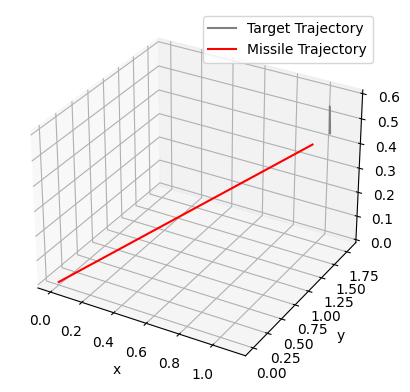

In [11]:
graph_solution(missile_speed, solution[1], solution[2], deltaXYZ, xyz_two, deltaT)